In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Reading the data
df = pd.read_csv("/content/sample_data/spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# This line of code removes unneccesary coloumns named unnamed:2, unnamed:3, unnamed:4 and rename columns v1 and v2 to label and text
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'label','v2':'Text'})
df['label_enc'] = df['label'].map({'ham':0,'spam':1})
df.head()

,label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<Axes: xlabel='label'>

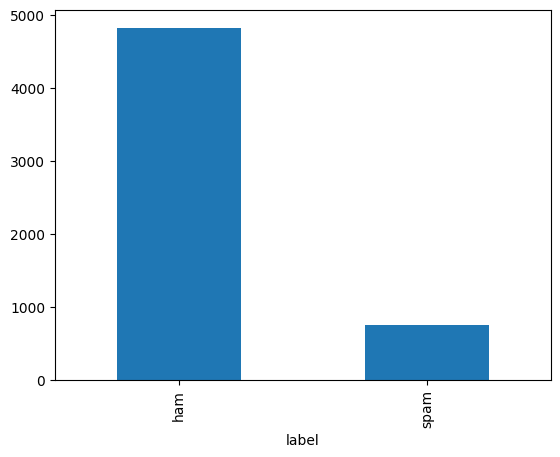

In [4]:
# This line of code calculates the frequency of each unique value in the 'label' column
df['label'].value_counts().plot(kind='bar')

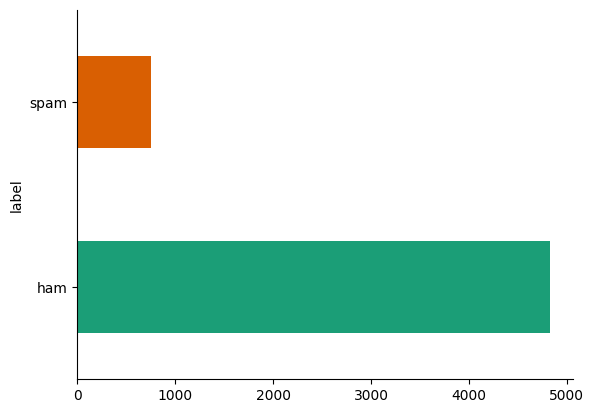

In [5]:
# This code groups the DataFrame df by the 'label' column, calculates the size of each group, and then plots a horizontal bar chart using the 'Dark2' color palette from Matplotlib
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

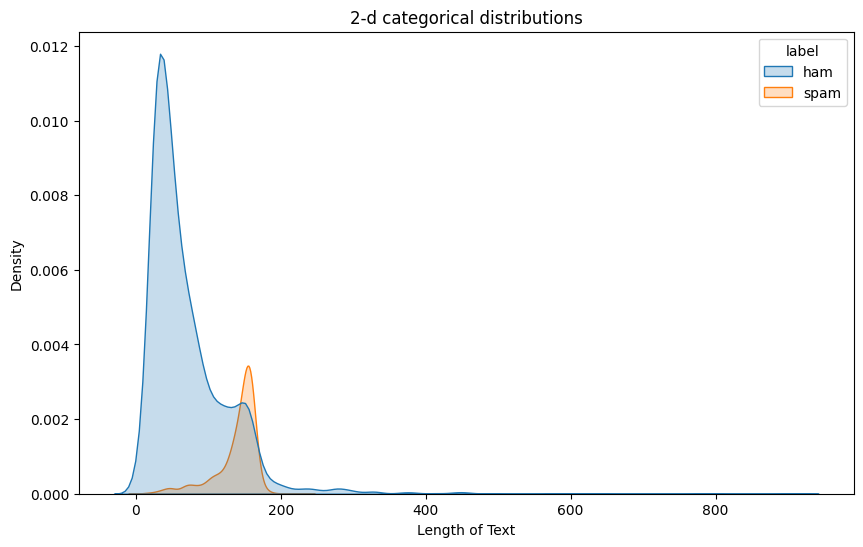

In [6]:
# It generates and displays a density plot using these text lengths to show variations in text length across different labels.
df['text_length'] = df['Text'].apply(len)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='text_length', hue='label', fill=True)
plt.title('2-d categorical distributions')
plt.xlabel('Length of Text')
plt.ylabel('Density')
plt.show()

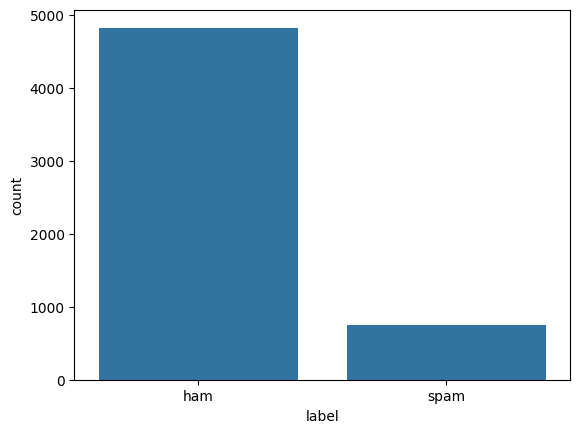

In [7]:
# This displays barplot which shows frequency of each unique values in label column.
sns.countplot(x=df['label'])
plt.show()

In [8]:
# This code calculates the average number of words per text message in the 'Text'
# column of the DataFrame df and prints the rounded result.
avg_words_len=round(sum([len(i.split()) for i in df['Text']])/len(df['Text']))
print(avg_words_len)

15


In [9]:
# This code iterates through each text message in the 'Text' column of the DataFrame df,
# splits each message into words, and adds these words to a set to ensure all entries are unique.
s = set()
for sent in df['Text']:
  for word in sent.split():
	  s.add(word)
total_words_length=len(s)
print(total_words_length)

15585


In [10]:
# Splitting data for Training and testing
# This code converts the 'Text' and 'label_enc' columns of the DataFrame df into numpy arrays, creates a new DataFrame new_df from these arrays,
# and then splits this new DataFrame into training and testing sets with 20% of the data reserved for testing.
from sklearn.model_selection import train_test_split

X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(
	new_df['Text'], new_df['label'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457,), (4457,), (1115,), (1115,))